# 1. Install Dependencies and Setup

In [1]:
!pip install tensorflow tensorflow-gpu opencv-python matplotlib

In [2]:
!pip list

Package                         Version
------------------------------- --------------------
absl-py                         1.2.0
aiohttp                         3.8.1
aiosignal                       1.2.0
alabaster                       0.7.12
albumentations                  1.3.0
ale-py                          0.7.4
anaconda-client                 1.9.0
anaconda-navigator              2.2.0
anaconda-project                0.10.2
anyio                           3.5.0
appdirs                         1.4.4
argon2-cffi                     21.3.0
argon2-cffi-bindings            21.2.0
arrow                           1.2.2
astroid                         2.6.6
astropy                         5.0.4
asttokens                       2.0.5
astunparse                      1.6.3
async-timeout                   4.0.1
atari-py                        0.2.9
atomicwrites                    1.4.0
attrs                           21.4.0
Automat                         20.2.0
autopep8                   

In [1]:
import tensorflow as tf
import os

In [2]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [3]:
tf.config.list_physical_devices('GPU')

[]

# 2. Remove dodgy images

In [4]:
import cv2
import imghdr # check file extension

In [5]:
data_dir = 'data' 

In [6]:
os.listdir(data_dir)

['d.jpeg', 'normal', 'pneumonia']

In [7]:
os.listdir(os.path.join(data_dir, 'normal'))

['.ipynb_checkpoints',
 'IM-0115-0001.jpeg',
 'IM-0117-0001.jpeg',
 'IM-0119-0001.jpeg',
 'IM-0122-0001.jpeg',
 'IM-0125-0001.jpeg',
 'IM-0127-0001.jpeg',
 'IM-0128-0001.jpeg',
 'IM-0129-0001.jpeg',
 'IM-0131-0001.jpeg',
 'IM-0133-0001.jpeg',
 'IM-0135-0001.jpeg',
 'IM-0137-0001.jpeg',
 'IM-0140-0001.jpeg',
 'IM-0141-0001.jpeg',
 'IM-0143-0001.jpeg',
 'IM-0145-0001.jpeg',
 'IM-0147-0001.jpeg',
 'IM-0149-0001.jpeg',
 'IM-0151-0001.jpeg',
 'IM-0152-0001.jpeg',
 'IM-0154-0001.jpeg',
 'IM-0156-0001.jpeg',
 'IM-0158-0001.jpeg',
 'IM-0160-0001.jpeg',
 'IM-0162-0001.jpeg',
 'IM-0164-0001.jpeg',
 'IM-0166-0001.jpeg',
 'IM-0168-0001.jpeg',
 'IM-0170-0001.jpeg',
 'IM-0172-0001.jpeg',
 'IM-0176-0001.jpeg',
 'IM-0177-0001.jpeg',
 'IM-0178-0001.jpeg',
 'IM-0180-0001.jpeg',
 'IM-0182-0001.jpeg',
 'IM-0183-0001.jpeg',
 'IM-0185-0001.jpeg',
 'IM-0187-0001.jpeg',
 'IM-0189-0001.jpeg',
 'IM-0191-0001.jpeg',
 'IM-0193-0001.jpeg',
 'IM-0195-0001.jpeg',
 'IM-0199-0001.jpeg',
 'IM-0201-0001.jpeg',
 'IM-0203

In [8]:
image_exts = ['jpeg','jpg', 'bmp', 'png']

In [9]:
image_exts 

['jpeg', 'jpg', 'bmp', 'png']

In [10]:
img = cv2.imread(os.path.join('data', 'normal', 'IM-0207-0001.jpeg'))

img.shape

(1049, 1426, 3)

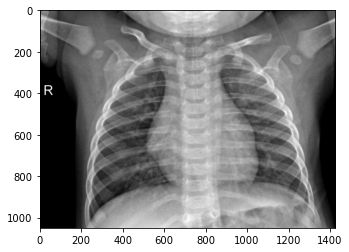

In [11]:
from matplotlib import pyplot as plt
plt.imshow(img)
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

In [12]:
print('Image not in ext list {}'.format(3))

Image not in ext list 3


In [65]:
# removing duggy images
for image_class in os.listdir(data_dir): 
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try: 
            img = cv2.imread(image_path)  # read image
            tip = imghdr.what(image_path)
            if tip not in image_exts: 
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)  #remove duggy
        except Exception as e: 
            print('Issue with image {}'.format(image_path))
            # os.remove(image_path)

NotADirectoryError: [WinError 267] The directory name is invalid: 'data\\d.jpeg'

# 3. Load Data

In [13]:
import numpy as np
from matplotlib import pyplot as plt

In [14]:
data = tf.keras.utils.image_dataset_from_directory??
# data = tf.keras.utils.image_dataset_from_directory('data', batch_size = 8)

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [14]:
data = tf.keras.utils.image_dataset_from_directory('data') 
# to use keras API, that build image dataset for you and you do not nees to label data or clases
# build a data pipeline

Found 5230 files belonging to 2 classes.


In [15]:
data_iterator = data.as_numpy_iterator() # you cannot access data array and you must change it to numppy
# allow access data pipeline

In [16]:
batch = data_iterator.next()

In [17]:
# images represent as numpy array
batch[0].shape

(32, 256, 256, 3)

In [18]:
batch[0]

array([[[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [2.49104492e+02, 2.49104492e+02, 2.49104492e+02],
         [9.98129883e+01, 9.98129883e+01, 9.98129883e+01],
         [3.29101562e+00, 3.29101562e+00, 3.29101562e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [5.27343750e+00, 5.27343750e+00, 5.27343750e+00],
         [2.49467285e+02, 2.49467285e+02, 2.49467285e+02],
         [4.90380859e+00, 4.90380859e+00, 4.90380859e+00]],

        [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
         ...,
         [1.83300781e+02, 1.83300781e+02, 1.83300781e+02],
         [

In [19]:
# labels represent as numpy array
batch[1]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 1])

In [20]:
len(batch) # one for images and another for label

2

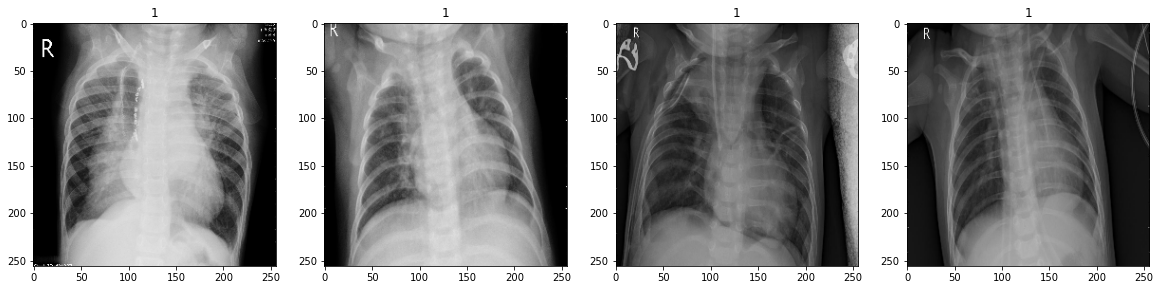

In [21]:
# to check which groupe assigned with which number  .astype(int)
fig, ax = plt.subplots(ncols=4, figsize=(20,20)) #subplot to plot four image at the same time
for idx, img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

# 4. Scale Data

In [22]:
# in tf.data you can find a lot of process that you can do on the function using pipline API. like map, shuffle
data = data.map(lambda x,y: (x/255, y))

In [23]:
data.as_numpy_iterator().next()

(array([[[[0.15367647, 0.15367647, 0.15367647],
          [0.16495098, 0.16495098, 0.16495098],
          [0.17166054, 0.17166054, 0.17166054],
          ...,
          [0.81397057, 0.81397057, 0.81397057],
          [0.81161153, 0.81161153, 0.81161153],
          [0.811489  , 0.811489  , 0.811489  ]],
 
         [[0.18529412, 0.18529412, 0.18529412],
          [0.19068627, 0.19068627, 0.19068627],
          [0.18722427, 0.18722427, 0.18722427],
          ...,
          [0.81397057, 0.81397057, 0.81397057],
          [0.81666666, 0.81666666, 0.81666666],
          [0.8186275 , 0.8186275 , 0.8186275 ]],
 
         [[0.1882353 , 0.1882353 , 0.1882353 ],
          [0.1867647 , 0.1867647 , 0.1867647 ],
          [0.19215687, 0.19215687, 0.19215687],
          ...,
          [0.8176777 , 0.8176777 , 0.8176777 ],
          [0.82454044, 0.82454044, 0.82454044],
          [0.8241728 , 0.8241728 , 0.8241728 ]],
 
         ...,
 
         [[0.09411765, 0.09411765, 0.09411765],
          [0.09411

In [24]:
data.as_numpy_iterator().next()[0].max() 


1.0

# 5. Split Data

In [25]:
len(data)

164

In [26]:
train_size = int(len(data)*.7) + 2
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)

In [27]:
train_size + val_size + test_size

164

In [28]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

# 6. Build Deep Learning Model

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [30]:
model = Sequential()

In [31]:
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [32]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [33]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

# 7. Train

In [34]:
logdir='logs'

In [35]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [36]:
hist = model.fit(train, epochs=4, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/4
116/116 [==============================] - 92s 777ms/step - loss: 0.2968 - accuracy: 0.8820 - val_loss: 0.2424 - val_accuracy: 0.9023
Epoch 2/4
 54/116 [============>.................] - ETA: 41s - loss: 0.1520 - accuracy: 0.9404

KeyboardInterrupt: 

# 8. Plot Performance

In [90]:
hist.history

{'loss': [0.25680476427078247,
  0.10783426463603973,
  0.09207533299922943,
  0.06325364112854004],
 'accuracy': [0.8865840435028076,
  0.9585129022598267,
  0.967133641242981,
  0.9762930870056152],
 'val_loss': [0.12583491206169128,
  0.09535181522369385,
  0.12213914096355438,
  0.06811775267124176],
 'val_accuracy': [0.958984375, 0.955078125, 0.943359375, 0.9765625]}

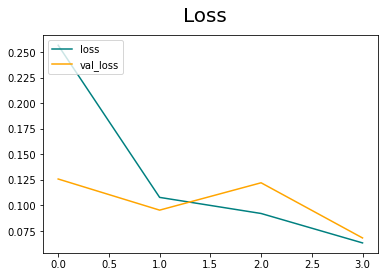

In [91]:
#plot the performance of training
# Divergance means overfitting
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

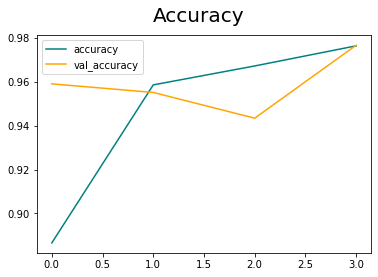

In [92]:
#plot the performance of training
# Divergance means overfitting
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

# 9. Evaluate

In [93]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy

In [94]:
pre = Precision()
re = Recall()
acc = BinaryAccuracy()

In [95]:
for batch in test.as_numpy_iterator(): 
    X, y = batch
    yhat = model.predict(X)
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 107ms/step


In [96]:
pre.result()

<tf.Tensor: shape=(), dtype=float32, numpy=0.99450547>

In [97]:
print(f'Precision:{pre.result().numpy()}, Recall:{re.result().numpy()}, Accuracy:{acc.result().numpy()}')

Precision:0.9945054650306702, Recall:0.9863760471343994, Accuracy:0.9858299493789673


# 10. Test

In [49]:
import cv2

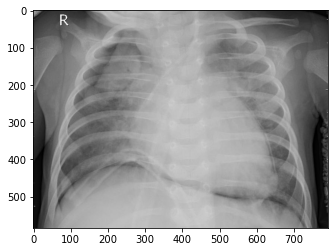

In [50]:
img = cv2.imread('person59_bacteria_281.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

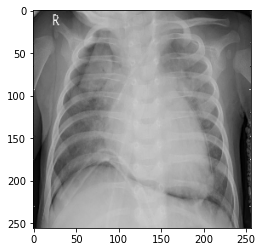

In [51]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [52]:
resize.shape

TensorShape([256, 256, 3])

In [53]:
np.expand_dims(resize, 0).shape

NameError: name 'np' is not defined

In [54]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0)) #import a batch of images because network is expected

1/1 [==============================] - 0s 49ms/step


In [52]:
yhat

array([[0.9991118]], dtype=float32)

In [53]:
if yhat > 0.5: 
    print(f'Predicted class is pneumonia')
else:
    print(f'Predicted class is normal')

Predicted class is pneumonia


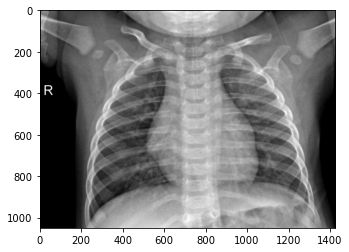

In [54]:
img = cv2.imread('IM-0207-0001.jpeg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

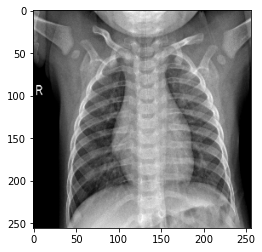

In [55]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [56]:
resize.shape

TensorShape([256, 256, 3])

In [57]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [58]:
import numpy as np
yhat = model.predict(np.expand_dims(resize/255, 0)) #import a batch of images because network is expected

1/1 [==============================] - 0s 52ms/step


In [59]:
yhat

array([[0.02225233]], dtype=float32)

In [60]:
if yhat > 0.5: 
    print(f'Predicted class is pneumonia')
else:
    print(f'Predicted class is normal')

Predicted class is normal


# 11. Save the Model

In [98]:
from tensorflow.keras.models import load_model

In [99]:
model.save(os.path.join('models','imageclassifierForlungprojectDAniyalSojoudi.h5'))

In [47]:
new_model = load_model(os.path.join('models','imageclassifierForHappyandSadDAniyal.h5'))

In [67]:
new_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 127, 127, 16)     0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 30, 30, 16)      

In [68]:
new_model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 73ms/step


array([[0.9859793]], dtype=float32)

In [109]:
def classify_image(img):
    img_new = tf.image.resize(img, (256,256))
    prediction = model.predict(np.expand_dims(img_new/255, 0))
    if prediction > 0.7: 
        text = f'Predicted class is pneumonia'
    else:
        text = f'Predicted class is normal'
    return text
    
import gradio as gr    
gr.Interface(fn=classify_image, 
             inputs=gr.Image(shape=(224, 224)),
             outputs='text').launch(share=True)

Running on local URL:  http://127.0.0.1:7884
Running on public URL: https://a5063942e3f216ed.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://www.huggingface.co/spaces


(<gradio.routes.App at 0x19e26ebcbb0>,
 'http://127.0.0.1:7884/',
 'https://a5063942e3f216ed.gradio.app')

1/1 [==============================] - 0s 42ms/step
